# Donderrs MML: Splitting Multiple Videos
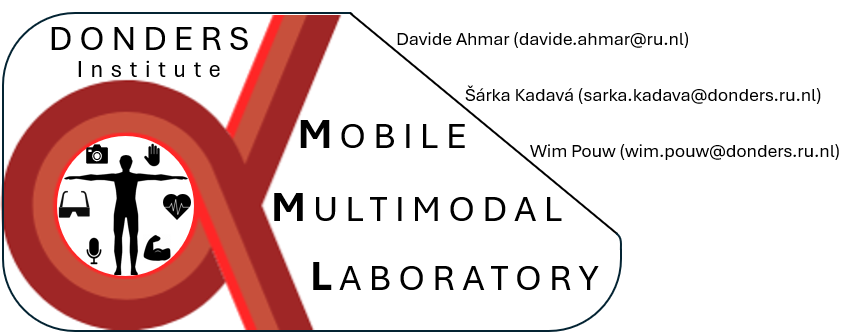


## Info documents
location Repositor :https://github.com/DavAhm/Mobile-Multimodal-Lab/tree/main/2_PREPROCESSING/2_MOTION_TRACKIN

location Jupyter Noteboo  
##  Requirements
Please install the necessary packages in requirements.
## OVERVIEWE
This Python script splits single videos containing multiple cameras views into individual videos of each separate view using OpenCV. 
It outputs the split video files into a specific folder structure, making them ready for further processing, such as motion tracking with tools like OpenPose or Pose2Sim. Below is an overview of the key steps in the code:

0. Importing Necessary Packages:
             see requirements.txt for all necessary packages

1. Defining Relevant Directories, Variables, and Functions:
         Working with relative paths, the scripts defines input and output folders.
         Video extension (e.g., *.avi) and corresponding codec extension (e.g., XVID) can be ajusted by the user accordingly.
         The current script assumes 3 cameras for each vidoe, each of them with an euqal height and width.
         The split_camera_views function is defined to handle the core task of splitting a video file into separate camera views. This function processes each video file, extracting frames and dividing them into distinct sections corresponding to different camera views. The split videos are then saved to specified output files.


2. and 2a. In **2** the script automatically scans a specified directory to identify and collect all video files with a specific extension (e.g., .avi). This allows for batch processing of multiple videos without requiring manual file selection.
   In **2a**, the the script provides an option for the user to manually select one or more video files through a graphical file dialog. This feature offers flexibility for the user to choose specific videos from any directory for processing.

3. The scripts loops through the selected or identified video files and splitting each one into separate camera views:
For each video file, the script extracts the filename and generates output file paths for each camera view (e.g., _cam1.avi, _cam2.avi, _cam3.avi).
The split_camera_views function is called to process the video, splitting it into three separate camera views and saving them in a structured folder, such as a raw-2d subfolder within the output directory.   

## 0. Importing Necessary Packages


In [1]:
import os                                 # Importing the os module which provides functions for interacting with the operating system
from moviepy.editor import (              # Importing functions from the MoviePy library, which is used for video editing.
                VideoFileClip,                # VideoFileClip allows you to load a video file and manipulate it as a clip object.
                concatenate_videoclips)       # concatenate_videoclips allows you to concatenate multiple video clips into one video.
import cv2                                # Importing cv2 module from OpenCV library, used for computer vision tasks (provides various functions to process images and videos).
import subprocess                         # Importing subprocess, commonly used for running external commands or scripts from within a Python script.
import tkinter                            # Importning tkinter, whch crates graphical user interfaces (GUIs) and provides a variety of widgets and controls to build desktop applications.
from tkinter import filedialog                # importing filedialog from tkinter, is a module in tkinter, which allows the user to select files or directories through a dialog window.
from tqdm import tqdm                     # Importing tqdm for the progress bar
import re

print("Everything was imported succesfully") #as terminal

Everything was imported succesfully


## 1. Defining the Relevant Directories, Variables & Functions

In [2]:
# ------------ DIRECTORIES -----------------------------
input_folder  = '../2_Video_Calibration/calibration_videos_raw/'    # Relative path to the input folder with the raw video files
output_folder = './video_split/'  # output folder where the split videos will be saved (relative path) 

print("Input folder =", os.path.abspath(input_folder))
print("Output folder =", os.path.abspath(output_folder))


# ----------- VARIABLES --------------------------
video_extension = '.avi'  # Video format extension avi. Change as needed (e.g., .mp4)
codec_extension  = 'XVID'  # Codec for avi. Consider other codecs for different extensions:
                            # '.mp4': 'libx264',
                            # '.avi': 'libxvid',
                            # '.mov': 'libx264',
                            # '.mkv': 'libx264',
                            # '.flv': 'flv',

num_cameras = 3          # Number of cameras for each "raw video". Change accordingly. 

condition_pattern_matching = re.compile(r'.(Vision|NoVision)_(Movement|NoMovement)')



# ----------- FUNCTIONS -------------------------
def split_camera_views(input_file, output_files, num_cameras=3, codec_extension='mp4v'):
    """
    This split_camera_views function takes an input video file and splits it into three separate video files, 
    each corresponding to a different camera view. It assumes that the input video is composed 
    of three side-by-side camera views. The function outputs three video files, each containing 
    one of the camera views.

    Parameters:
    input_file (str): The path to the input video file.
    output_files (list of str): A list containing the paths to the output video files for each camera view.
    num_cameras (int): The number of camera views in the input video. Default is 3.
    codec_extension (str): The codec extension to be used for the output videos. Default is 'mp4v'.
    """
    
    cap = cv2.VideoCapture(input_file)  # Open the video file

    # Extract relevant information from the video
    width_per_camera = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) // num_cameras  # Calculate width per camera
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Get the height of the video (same for all cameras)
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))  # Get the frame rate of the video (same for all cameras)

    # Create VideoWriters for each camera
    fourcc = cv2.VideoWriter_fourcc(*codec_extension)  # Define the codec for the output videos
    out_cam1 = cv2.VideoWriter(output_files[0], fourcc, frame_rate, (width_per_camera, height))  # Create VideoWriter for the first camera
    out_cam2 = cv2.VideoWriter(output_files[1], fourcc, frame_rate, (width_per_camera, height))  # Create VideoWriter for the second camera
    out_cam3 = cv2.VideoWriter(output_files[2], fourcc, frame_rate, (width_per_camera, height))  # Create VideoWriter for the third camera

    while True:  # Loop to read frames from the video
        ret, frame = cap.read()  # Read a frame from the video

        # Check if the frame is None (end of video)
        if frame is None:  # If no frame is returned, break the loop
            break

        # Break the frame into three parts
        camera1_frame = frame[:, :width_per_camera, :]                    # Extract the first camera view
        camera2_frame = frame[:, width_per_camera:2*width_per_camera, :]  # Extract the second camera view
        camera3_frame = frame[:, 2*width_per_camera:, :]                  # Extract the third camera view

        # Display each camera view separately (optional)
        cv2.imshow('Camera 1', camera1_frame)  # Display the first camera view
        # cv2.imshow('Camera 2', camera2_frame)  # Display the second camera view
        # cv2.imshow('Camera 3', camera3_frame)  # Display the third camera view

        # Write frames to video files
        out_cam1.write(camera1_frame)  # Write the first camera view to its file
        out_cam2.write(camera2_frame)  # Write the second camera view to its file
        out_cam3.write(camera3_frame)  # Write the third camera view to its file

        if cv2.waitKey(1) == 27:  # Break the loop if 'Esc' key is pressed
            break

    # Release VideoWriters and VideoCapture
    out_cam1.release()  # Release the VideoWriter for the first camera
    out_cam2.release()  # Release the VideoWriter for the second camera
    out_cam3.release()  # Release the VideoWriter for the third camera
    cap.release()  # Release the VideoCapture
    cv2.destroyAllWindows()  # Close all OpenCV windows

print('Function split_camera_views created successfully')

Input folder = e:\research_flesh\2_Video_Calibration\calibration_videos_raw
Output folder = e:\research_flesh\GtSTcollab\video_split
Function split_camera_views created successfully


## 2. Identifying Relevant Videos in the input_folder 

In [48]:
video_files = [ ]    # Initialize an empty list to store paths of video files

# Traverse through the directory and its subdirectories to find XDF files
for root, dirs, videos in os.walk(os.path.abspath(input_folder)):  # 1st loop iterating over the results returned by os.walk().
    print(input_folder)
    
    for video in videos:                               # 2nd loop iterating through each file in the current directory
        
        if video.endswith(video_extension):            # checking if the video has the specified video_extension (e.g., '.avi') 
            
             video_files.append(os.path.join(root, video))   # if the video is an .avi file, append its full path to the  list
            
print('We have idenified the following vides: ' + str(video_files))

../2_Video_Calibration/calibration_videos_raw/
We have idenified the following vides: ['f:\\Mobile-Multimodal-Lab\\2_PREPROCESSING\\3_MOTION_TRACKING\\2_Video_Calibration\\calibration_videos_raw\\Calibration_P1_T1_Charuco_2024-04-23_output_compr.avi', 'f:\\Mobile-Multimodal-Lab\\2_PREPROCESSING\\3_MOTION_TRACKING\\2_Video_Calibration\\calibration_videos_raw\\Calibration_P2_T1_Charuco_2024-04-23_output_compr.avi']


In [27]:
print(input_folder)

../2_Video_Calibration/calibration_videos_raw/


## 2a. Alternatively, the user can select their own Videos from any directory. 

In [22]:
root = tkinter.Tk()
root.attributes('-topmost',True)
root.iconify()

video_files = filedialog.askopenfilename(title="Select one or multiple Videos in the format" + str(video_extension), filetypes=[("Video Files", str(video_extension))], multiple = 'True')

root.destroy()

# Convert the tuple returned by askopenfilenames() to a list
video_files = list(video_files)

print('You have selected the following Videos: ' + str(video_files))

You have selected the following Videos: ['F:/Mobile-Multimodal-Lab/2_PREPROCESSING/3_MOTION_TRACKING/2_Video Calibration/calibration_videos_raw/Calibration_P1_T1_Charuco_2024-04-23_output_compr.avi', 'F:/Mobile-Multimodal-Lab/2_PREPROCESSING/3_MOTION_TRACKING/2_Video Calibration/calibration_videos_raw/Calibration_P2_T1_Charuco_2024-04-23_output_compr.avi']


## 3. Splitting Videos (Loop)

In [50]:

## This is temporary for the calibration files (different naming format)

# loop over files in folder and split them
for file in tqdm(video_files, desc="Splitting the videos: ", unit="file"):

    # Get the name of the file without the extension
    filename = os.path.splitext(os.path.basename(file))[0]
    
    # Get the participant, condition and trial from the filename
    participant = str(filename.split('_')[1])
    print(participant)

    
    subfolder_path = os.path.join(output_folder, participant)
    
    # Check if the subfolder exists, if not create it
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    # create output file names for each camera, and save the three videos into ouput_folder with their correspodning camera angle 
    output_files = [
        os.path.join(subfolder_path, filename + '_cam1.avi'),
        os.path.join(subfolder_path, filename + '_cam2.avi'),
        os.path.join(subfolder_path, filename + '_cam3.avi')
    ]

    # Make sure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    print("saving Split Videos as: " + str(output_files))


    # Splitting the videos using the function split_camera view
    split_camera_views(file, output_files)

print('Done, you can now look into the folder: ' + output_folder)

Splitting the videos:   0%|          | 0/2 [00:00<?, ?file/s]

P1
saving Split Videos as: ['../2_Video_Calibration/calibration_videos_split/P1\\Calibration_P1_T1_Charuco_2024-04-23_output_compr_cam1.avi', '../2_Video_Calibration/calibration_videos_split/P1\\Calibration_P1_T1_Charuco_2024-04-23_output_compr_cam2.avi', '../2_Video_Calibration/calibration_videos_split/P1\\Calibration_P1_T1_Charuco_2024-04-23_output_compr_cam3.avi']


Splitting the videos:  50%|█████     | 1/2 [00:36<00:36, 36.31s/file]

P2
saving Split Videos as: ['../2_Video_Calibration/calibration_videos_split/P2\\Calibration_P2_T1_Charuco_2024-04-23_output_compr_cam1.avi', '../2_Video_Calibration/calibration_videos_split/P2\\Calibration_P2_T1_Charuco_2024-04-23_output_compr_cam2.avi', '../2_Video_Calibration/calibration_videos_split/P2\\Calibration_P2_T1_Charuco_2024-04-23_output_compr_cam3.avi']


Splitting the videos: 100%|██████████| 2/2 [01:18<00:00, 39.07s/file]

Done, you can now look into the folder: ../2_Video_Calibration/calibration_videos_split/


In [9]:
# loop over files in folder and split them
for file in tqdm(video_files, desc="Splitting the videos: ", unit="file"):

    # Get the name of the file without the extension
    filename = os.path.splitext(os.path.basename(file))[0]
    
    # Get the participant, condition and trial from the filename
    participant = str(filename.split('_')[3])
    condition = str(filename.split('_')[4] + '_' + filename.split('_')[5])
    trial    = 'trial_' + str(filename.split('_')[6])
    print('Participant: ' + participant)
    print('Condition: ' + condition)
    print('Trial: ' + trial)    

    
    subfolder_path = os.path.join(output_folder, participant, condition, trial)
    
    # Check if the subfolder exists, if not create it
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    # create output file names for each camera, and save the three videos into ouput_folder with their correspodning camera angle 
    output_files = [
        os.path.join(subfolder_path, filename + '_cam1.avi'),
        os.path.join(subfolder_path, filename + '_cam2.avi'),
        os.path.join(subfolder_path, filename + '_cam3.avi')
    ]

    # Make sure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    print("saving Split Videos as: " + str(output_files))


    # Splitting the videos using the function split_camera view
    split_camera_views(file, output_files)

print('Done, you can now look into the folder: ' + output_folder)

Splitting the videos:   0%|          | 0/40 [00:00<?, ?file/s]

Participant: P1
Condition: NoVision_Movement
Trial: trial_0
saving Split Videos as: ['./video_split/P1\\NoVision_Movement\\trial_0\\T1_experiment_Video_P1_NoVision_Movement_0_StartParticipantSinging_NoVision_Movement_0_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_Movement\\trial_0\\T1_experiment_Video_P1_NoVision_Movement_0_StartParticipantSinging_NoVision_Movement_0_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_Movement\\trial_0\\T1_experiment_Video_P1_NoVision_Movement_0_StartParticipantSinging_NoVision_Movement_0_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:   2%|▎         | 1/40 [00:12<07:58, 12.27s/file]

Participant: P1
Condition: NoVision_Movement
Trial: trial_1
saving Split Videos as: ['./video_split/P1\\NoVision_Movement\\trial_1\\T1_experiment_Video_P1_NoVision_Movement_1_StartParticipantSinging_NoVision_Movement_1_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_Movement\\trial_1\\T1_experiment_Video_P1_NoVision_Movement_1_StartParticipantSinging_NoVision_Movement_1_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_Movement\\trial_1\\T1_experiment_Video_P1_NoVision_Movement_1_StartParticipantSinging_NoVision_Movement_1_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:   5%|▌         | 2/40 [00:24<07:51, 12.42s/file]

Participant: P1
Condition: NoVision_Movement
Trial: trial_2
saving Split Videos as: ['./video_split/P1\\NoVision_Movement\\trial_2\\T1_experiment_Video_P1_NoVision_Movement_2_StartParticipantSinging_NoVision_Movement_2_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_Movement\\trial_2\\T1_experiment_Video_P1_NoVision_Movement_2_StartParticipantSinging_NoVision_Movement_2_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_Movement\\trial_2\\T1_experiment_Video_P1_NoVision_Movement_2_StartParticipantSinging_NoVision_Movement_2_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:   8%|▊         | 3/40 [00:37<07:41, 12.48s/file]

Participant: P1
Condition: NoVision_Movement
Trial: trial_3
saving Split Videos as: ['./video_split/P1\\NoVision_Movement\\trial_3\\T1_experiment_Video_P1_NoVision_Movement_3_StartParticipantSinging_NoVision_Movement_3_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_Movement\\trial_3\\T1_experiment_Video_P1_NoVision_Movement_3_StartParticipantSinging_NoVision_Movement_3_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_Movement\\trial_3\\T1_experiment_Video_P1_NoVision_Movement_3_StartParticipantSinging_NoVision_Movement_3_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  10%|█         | 4/40 [00:49<07:29, 12.50s/file]

Participant: P1
Condition: NoVision_Movement
Trial: trial_4
saving Split Videos as: ['./video_split/P1\\NoVision_Movement\\trial_4\\T1_experiment_Video_P1_NoVision_Movement_4_StartParticipantSinging_NoVision_Movement_4_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_Movement\\trial_4\\T1_experiment_Video_P1_NoVision_Movement_4_StartParticipantSinging_NoVision_Movement_4_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_Movement\\trial_4\\T1_experiment_Video_P1_NoVision_Movement_4_StartParticipantSinging_NoVision_Movement_4_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  12%|█▎        | 5/40 [01:02<07:17, 12.51s/file]

Participant: P1
Condition: NoVision_NoMovement
Trial: trial_0
saving Split Videos as: ['./video_split/P1\\NoVision_NoMovement\\trial_0\\T1_experiment_Video_P1_NoVision_NoMovement_0_StartParticipantSinging_NoVision_NoMovement_0_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_NoMovement\\trial_0\\T1_experiment_Video_P1_NoVision_NoMovement_0_StartParticipantSinging_NoVision_NoMovement_0_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_NoMovement\\trial_0\\T1_experiment_Video_P1_NoVision_NoMovement_0_StartParticipantSinging_NoVision_NoMovement_0_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  15%|█▌        | 6/40 [01:14<06:58, 12.30s/file]

Participant: P1
Condition: NoVision_NoMovement
Trial: trial_1
saving Split Videos as: ['./video_split/P1\\NoVision_NoMovement\\trial_1\\T1_experiment_Video_P1_NoVision_NoMovement_1_StartParticipantSinging_NoVision_NoMovement_1_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_NoMovement\\trial_1\\T1_experiment_Video_P1_NoVision_NoMovement_1_StartParticipantSinging_NoVision_NoMovement_1_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_NoMovement\\trial_1\\T1_experiment_Video_P1_NoVision_NoMovement_1_StartParticipantSinging_NoVision_NoMovement_1_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  18%|█▊        | 7/40 [01:26<06:41, 12.17s/file]

Participant: P1
Condition: NoVision_NoMovement
Trial: trial_2
saving Split Videos as: ['./video_split/P1\\NoVision_NoMovement\\trial_2\\T1_experiment_Video_P1_NoVision_NoMovement_2_StartParticipantSinging_NoVision_NoMovement_2_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_NoMovement\\trial_2\\T1_experiment_Video_P1_NoVision_NoMovement_2_StartParticipantSinging_NoVision_NoMovement_2_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_NoMovement\\trial_2\\T1_experiment_Video_P1_NoVision_NoMovement_2_StartParticipantSinging_NoVision_NoMovement_2_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  20%|██        | 8/40 [01:38<06:28, 12.13s/file]

Participant: P1
Condition: NoVision_NoMovement
Trial: trial_3
saving Split Videos as: ['./video_split/P1\\NoVision_NoMovement\\trial_3\\T1_experiment_Video_P1_NoVision_NoMovement_3_StartParticipantSinging_NoVision_NoMovement_3_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_NoMovement\\trial_3\\T1_experiment_Video_P1_NoVision_NoMovement_3_StartParticipantSinging_NoVision_NoMovement_3_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_NoMovement\\trial_3\\T1_experiment_Video_P1_NoVision_NoMovement_3_StartParticipantSinging_NoVision_NoMovement_3_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  22%|██▎       | 9/40 [01:49<06:11, 11.99s/file]

Participant: P1
Condition: NoVision_NoMovement
Trial: trial_4
saving Split Videos as: ['./video_split/P1\\NoVision_NoMovement\\trial_4\\T1_experiment_Video_P1_NoVision_NoMovement_4_StartParticipantSinging_NoVision_NoMovement_4_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\NoVision_NoMovement\\trial_4\\T1_experiment_Video_P1_NoVision_NoMovement_4_StartParticipantSinging_NoVision_NoMovement_4_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\NoVision_NoMovement\\trial_4\\T1_experiment_Video_P1_NoVision_NoMovement_4_StartParticipantSinging_NoVision_NoMovement_4_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  25%|██▌       | 10/40 [02:01<05:53, 11.79s/file]

Participant: P1
Condition: Vision_Movement
Trial: trial_0
saving Split Videos as: ['./video_split/P1\\Vision_Movement\\trial_0\\T1_experiment_Video_P1_Vision_Movement_0_StartParticipantSinging_Vision_Movement_0_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_Movement\\trial_0\\T1_experiment_Video_P1_Vision_Movement_0_StartParticipantSinging_Vision_Movement_0_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_Movement\\trial_0\\T1_experiment_Video_P1_Vision_Movement_0_StartParticipantSinging_Vision_Movement_0_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  28%|██▊       | 11/40 [02:13<05:50, 12.08s/file]

Participant: P1
Condition: Vision_Movement
Trial: trial_1
saving Split Videos as: ['./video_split/P1\\Vision_Movement\\trial_1\\T1_experiment_Video_P1_Vision_Movement_1_StartParticipantSinging_Vision_Movement_1_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_Movement\\trial_1\\T1_experiment_Video_P1_Vision_Movement_1_StartParticipantSinging_Vision_Movement_1_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_Movement\\trial_1\\T1_experiment_Video_P1_Vision_Movement_1_StartParticipantSinging_Vision_Movement_1_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  30%|███       | 12/40 [02:26<05:42, 12.22s/file]

Participant: P1
Condition: Vision_Movement
Trial: trial_2
saving Split Videos as: ['./video_split/P1\\Vision_Movement\\trial_2\\T1_experiment_Video_P1_Vision_Movement_2_StartParticipantSinging_Vision_Movement_2_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_Movement\\trial_2\\T1_experiment_Video_P1_Vision_Movement_2_StartParticipantSinging_Vision_Movement_2_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_Movement\\trial_2\\T1_experiment_Video_P1_Vision_Movement_2_StartParticipantSinging_Vision_Movement_2_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  32%|███▎      | 13/40 [02:39<05:32, 12.33s/file]

Participant: P1
Condition: Vision_Movement
Trial: trial_3
saving Split Videos as: ['./video_split/P1\\Vision_Movement\\trial_3\\T1_experiment_Video_P1_Vision_Movement_3_StartParticipantSinging_Vision_Movement_3_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_Movement\\trial_3\\T1_experiment_Video_P1_Vision_Movement_3_StartParticipantSinging_Vision_Movement_3_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_Movement\\trial_3\\T1_experiment_Video_P1_Vision_Movement_3_StartParticipantSinging_Vision_Movement_3_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  35%|███▌      | 14/40 [02:51<05:19, 12.29s/file]

Participant: P1
Condition: Vision_Movement
Trial: trial_4
saving Split Videos as: ['./video_split/P1\\Vision_Movement\\trial_4\\T1_experiment_Video_P1_Vision_Movement_4_StartParticipantSinging_Vision_Movement_4_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_Movement\\trial_4\\T1_experiment_Video_P1_Vision_Movement_4_StartParticipantSinging_Vision_Movement_4_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_Movement\\trial_4\\T1_experiment_Video_P1_Vision_Movement_4_StartParticipantSinging_Vision_Movement_4_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  38%|███▊      | 15/40 [03:03<05:05, 12.23s/file]

Participant: P1
Condition: Vision_NoMovement
Trial: trial_0
saving Split Videos as: ['./video_split/P1\\Vision_NoMovement\\trial_0\\T1_experiment_Video_P1_Vision_NoMovement_0_StartParticipantSinging_Vision_NoMovement_0_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_NoMovement\\trial_0\\T1_experiment_Video_P1_Vision_NoMovement_0_StartParticipantSinging_Vision_NoMovement_0_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_NoMovement\\trial_0\\T1_experiment_Video_P1_Vision_NoMovement_0_StartParticipantSinging_Vision_NoMovement_0_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  40%|████      | 16/40 [03:15<04:55, 12.31s/file]

Participant: P1
Condition: Vision_NoMovement
Trial: trial_1
saving Split Videos as: ['./video_split/P1\\Vision_NoMovement\\trial_1\\T1_experiment_Video_P1_Vision_NoMovement_1_StartParticipantSinging_Vision_NoMovement_1_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_NoMovement\\trial_1\\T1_experiment_Video_P1_Vision_NoMovement_1_StartParticipantSinging_Vision_NoMovement_1_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_NoMovement\\trial_1\\T1_experiment_Video_P1_Vision_NoMovement_1_StartParticipantSinging_Vision_NoMovement_1_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  42%|████▎     | 17/40 [03:27<04:40, 12.20s/file]

Participant: P1
Condition: Vision_NoMovement
Trial: trial_2
saving Split Videos as: ['./video_split/P1\\Vision_NoMovement\\trial_2\\T1_experiment_Video_P1_Vision_NoMovement_2_StartParticipantSinging_Vision_NoMovement_2_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_NoMovement\\trial_2\\T1_experiment_Video_P1_Vision_NoMovement_2_StartParticipantSinging_Vision_NoMovement_2_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_NoMovement\\trial_2\\T1_experiment_Video_P1_Vision_NoMovement_2_StartParticipantSinging_Vision_NoMovement_2_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  45%|████▌     | 18/40 [03:40<04:30, 12.29s/file]

Participant: P1
Condition: Vision_NoMovement
Trial: trial_3
saving Split Videos as: ['./video_split/P1\\Vision_NoMovement\\trial_3\\T1_experiment_Video_P1_Vision_NoMovement_3_StartParticipantSinging_Vision_NoMovement_3_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_NoMovement\\trial_3\\T1_experiment_Video_P1_Vision_NoMovement_3_StartParticipantSinging_Vision_NoMovement_3_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_NoMovement\\trial_3\\T1_experiment_Video_P1_Vision_NoMovement_3_StartParticipantSinging_Vision_NoMovement_3_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  48%|████▊     | 19/40 [03:52<04:19, 12.37s/file]

Participant: P1
Condition: Vision_NoMovement
Trial: trial_4
saving Split Videos as: ['./video_split/P1\\Vision_NoMovement\\trial_4\\T1_experiment_Video_P1_Vision_NoMovement_4_StartParticipantSinging_Vision_NoMovement_4_EndParticipantSinging_clipped_cam1.avi', './video_split/P1\\Vision_NoMovement\\trial_4\\T1_experiment_Video_P1_Vision_NoMovement_4_StartParticipantSinging_Vision_NoMovement_4_EndParticipantSinging_clipped_cam2.avi', './video_split/P1\\Vision_NoMovement\\trial_4\\T1_experiment_Video_P1_Vision_NoMovement_4_StartParticipantSinging_Vision_NoMovement_4_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  50%|█████     | 20/40 [04:05<04:07, 12.38s/file]

Participant: P2
Condition: NoVision_Movement
Trial: trial_0
saving Split Videos as: ['./video_split/P2\\NoVision_Movement\\trial_0\\T1_experiment_Video_P2_NoVision_Movement_0_StartParticipantSinging_NoVision_Movement_0_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_Movement\\trial_0\\T1_experiment_Video_P2_NoVision_Movement_0_StartParticipantSinging_NoVision_Movement_0_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_Movement\\trial_0\\T1_experiment_Video_P2_NoVision_Movement_0_StartParticipantSinging_NoVision_Movement_0_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  52%|█████▎    | 21/40 [04:18<03:59, 12.59s/file]

Participant: P2
Condition: NoVision_Movement
Trial: trial_1
saving Split Videos as: ['./video_split/P2\\NoVision_Movement\\trial_1\\T1_experiment_Video_P2_NoVision_Movement_1_StartParticipantSinging_NoVision_Movement_1_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_Movement\\trial_1\\T1_experiment_Video_P2_NoVision_Movement_1_StartParticipantSinging_NoVision_Movement_1_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_Movement\\trial_1\\T1_experiment_Video_P2_NoVision_Movement_1_StartParticipantSinging_NoVision_Movement_1_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  55%|█████▌    | 22/40 [04:31<03:48, 12.72s/file]

Participant: P2
Condition: NoVision_Movement
Trial: trial_2
saving Split Videos as: ['./video_split/P2\\NoVision_Movement\\trial_2\\T1_experiment_Video_P2_NoVision_Movement_2_StartParticipantSinging_NoVision_Movement_2_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_Movement\\trial_2\\T1_experiment_Video_P2_NoVision_Movement_2_StartParticipantSinging_NoVision_Movement_2_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_Movement\\trial_2\\T1_experiment_Video_P2_NoVision_Movement_2_StartParticipantSinging_NoVision_Movement_2_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  57%|█████▊    | 23/40 [04:44<03:38, 12.83s/file]

Participant: P2
Condition: NoVision_Movement
Trial: trial_3
saving Split Videos as: ['./video_split/P2\\NoVision_Movement\\trial_3\\T1_experiment_Video_P2_NoVision_Movement_3_StartParticipantSinging_NoVision_Movement_3_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_Movement\\trial_3\\T1_experiment_Video_P2_NoVision_Movement_3_StartParticipantSinging_NoVision_Movement_3_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_Movement\\trial_3\\T1_experiment_Video_P2_NoVision_Movement_3_StartParticipantSinging_NoVision_Movement_3_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  60%|██████    | 24/40 [04:57<03:26, 12.90s/file]

Participant: P2
Condition: NoVision_Movement
Trial: trial_4
saving Split Videos as: ['./video_split/P2\\NoVision_Movement\\trial_4\\T1_experiment_Video_P2_NoVision_Movement_4_StartParticipantSinging_NoVision_Movement_4_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_Movement\\trial_4\\T1_experiment_Video_P2_NoVision_Movement_4_StartParticipantSinging_NoVision_Movement_4_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_Movement\\trial_4\\T1_experiment_Video_P2_NoVision_Movement_4_StartParticipantSinging_NoVision_Movement_4_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  62%|██████▎   | 25/40 [05:10<03:14, 12.95s/file]

Participant: P2
Condition: NoVision_NoMovement
Trial: trial_0
saving Split Videos as: ['./video_split/P2\\NoVision_NoMovement\\trial_0\\T1_experiment_Video_P2_NoVision_NoMovement_0_StartParticipantSinging_NoVision_NoMovement_0_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_NoMovement\\trial_0\\T1_experiment_Video_P2_NoVision_NoMovement_0_StartParticipantSinging_NoVision_NoMovement_0_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_NoMovement\\trial_0\\T1_experiment_Video_P2_NoVision_NoMovement_0_StartParticipantSinging_NoVision_NoMovement_0_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  65%|██████▌   | 26/40 [05:23<03:01, 12.93s/file]

Participant: P2
Condition: NoVision_NoMovement
Trial: trial_1
saving Split Videos as: ['./video_split/P2\\NoVision_NoMovement\\trial_1\\T1_experiment_Video_P2_NoVision_NoMovement_1_StartParticipantSinging_NoVision_NoMovement_1_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_NoMovement\\trial_1\\T1_experiment_Video_P2_NoVision_NoMovement_1_StartParticipantSinging_NoVision_NoMovement_1_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_NoMovement\\trial_1\\T1_experiment_Video_P2_NoVision_NoMovement_1_StartParticipantSinging_NoVision_NoMovement_1_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  68%|██████▊   | 27/40 [05:36<02:48, 12.96s/file]

Participant: P2
Condition: NoVision_NoMovement
Trial: trial_2
saving Split Videos as: ['./video_split/P2\\NoVision_NoMovement\\trial_2\\T1_experiment_Video_P2_NoVision_NoMovement_2_StartParticipantSinging_NoVision_NoMovement_2_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_NoMovement\\trial_2\\T1_experiment_Video_P2_NoVision_NoMovement_2_StartParticipantSinging_NoVision_NoMovement_2_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_NoMovement\\trial_2\\T1_experiment_Video_P2_NoVision_NoMovement_2_StartParticipantSinging_NoVision_NoMovement_2_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  70%|███████   | 28/40 [05:49<02:35, 12.99s/file]

Participant: P2
Condition: NoVision_NoMovement
Trial: trial_3
saving Split Videos as: ['./video_split/P2\\NoVision_NoMovement\\trial_3\\T1_experiment_Video_P2_NoVision_NoMovement_3_StartParticipantSinging_NoVision_NoMovement_3_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_NoMovement\\trial_3\\T1_experiment_Video_P2_NoVision_NoMovement_3_StartParticipantSinging_NoVision_NoMovement_3_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_NoMovement\\trial_3\\T1_experiment_Video_P2_NoVision_NoMovement_3_StartParticipantSinging_NoVision_NoMovement_3_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  72%|███████▎  | 29/40 [06:02<02:23, 13.01s/file]

Participant: P2
Condition: NoVision_NoMovement
Trial: trial_4
saving Split Videos as: ['./video_split/P2\\NoVision_NoMovement\\trial_4\\T1_experiment_Video_P2_NoVision_NoMovement_4_StartParticipantSinging_NoVision_NoMovement_4_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\NoVision_NoMovement\\trial_4\\T1_experiment_Video_P2_NoVision_NoMovement_4_StartParticipantSinging_NoVision_NoMovement_4_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\NoVision_NoMovement\\trial_4\\T1_experiment_Video_P2_NoVision_NoMovement_4_StartParticipantSinging_NoVision_NoMovement_4_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  75%|███████▌  | 30/40 [06:15<02:10, 13.02s/file]

Participant: P2
Condition: Vision_Movement
Trial: trial_0
saving Split Videos as: ['./video_split/P2\\Vision_Movement\\trial_0\\T1_experiment_Video_P2_Vision_Movement_0_StartParticipantSinging_Vision_Movement_0_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_Movement\\trial_0\\T1_experiment_Video_P2_Vision_Movement_0_StartParticipantSinging_Vision_Movement_0_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_Movement\\trial_0\\T1_experiment_Video_P2_Vision_Movement_0_StartParticipantSinging_Vision_Movement_0_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  78%|███████▊  | 31/40 [06:28<01:58, 13.11s/file]

Participant: P2
Condition: Vision_Movement
Trial: trial_1
saving Split Videos as: ['./video_split/P2\\Vision_Movement\\trial_1\\T1_experiment_Video_P2_Vision_Movement_1_StartParticipantSinging_Vision_Movement_1_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_Movement\\trial_1\\T1_experiment_Video_P2_Vision_Movement_1_StartParticipantSinging_Vision_Movement_1_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_Movement\\trial_1\\T1_experiment_Video_P2_Vision_Movement_1_StartParticipantSinging_Vision_Movement_1_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  80%|████████  | 32/40 [06:42<01:45, 13.16s/file]

Participant: P2
Condition: Vision_Movement
Trial: trial_2
saving Split Videos as: ['./video_split/P2\\Vision_Movement\\trial_2\\T1_experiment_Video_P2_Vision_Movement_2_StartParticipantSinging_Vision_Movement_2_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_Movement\\trial_2\\T1_experiment_Video_P2_Vision_Movement_2_StartParticipantSinging_Vision_Movement_2_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_Movement\\trial_2\\T1_experiment_Video_P2_Vision_Movement_2_StartParticipantSinging_Vision_Movement_2_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  82%|████████▎ | 33/40 [06:55<01:32, 13.17s/file]

Participant: P2
Condition: Vision_Movement
Trial: trial_3
saving Split Videos as: ['./video_split/P2\\Vision_Movement\\trial_3\\T1_experiment_Video_P2_Vision_Movement_3_StartParticipantSinging_Vision_Movement_3_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_Movement\\trial_3\\T1_experiment_Video_P2_Vision_Movement_3_StartParticipantSinging_Vision_Movement_3_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_Movement\\trial_3\\T1_experiment_Video_P2_Vision_Movement_3_StartParticipantSinging_Vision_Movement_3_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  85%|████████▌ | 34/40 [07:08<01:19, 13.18s/file]

Participant: P2
Condition: Vision_Movement
Trial: trial_4
saving Split Videos as: ['./video_split/P2\\Vision_Movement\\trial_4\\T1_experiment_Video_P2_Vision_Movement_4_StartParticipantSinging_Vision_Movement_4_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_Movement\\trial_4\\T1_experiment_Video_P2_Vision_Movement_4_StartParticipantSinging_Vision_Movement_4_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_Movement\\trial_4\\T1_experiment_Video_P2_Vision_Movement_4_StartParticipantSinging_Vision_Movement_4_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  88%|████████▊ | 35/40 [07:21<01:05, 13.16s/file]

Participant: P2
Condition: Vision_NoMovement
Trial: trial_0
saving Split Videos as: ['./video_split/P2\\Vision_NoMovement\\trial_0\\T1_experiment_Video_P2_Vision_NoMovement_0_StartParticipantSinging_Vision_NoMovement_0_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_NoMovement\\trial_0\\T1_experiment_Video_P2_Vision_NoMovement_0_StartParticipantSinging_Vision_NoMovement_0_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_NoMovement\\trial_0\\T1_experiment_Video_P2_Vision_NoMovement_0_StartParticipantSinging_Vision_NoMovement_0_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  90%|█████████ | 36/40 [07:34<00:52, 13.15s/file]

Participant: P2
Condition: Vision_NoMovement
Trial: trial_1
saving Split Videos as: ['./video_split/P2\\Vision_NoMovement\\trial_1\\T1_experiment_Video_P2_Vision_NoMovement_1_StartParticipantSinging_Vision_NoMovement_1_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_NoMovement\\trial_1\\T1_experiment_Video_P2_Vision_NoMovement_1_StartParticipantSinging_Vision_NoMovement_1_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_NoMovement\\trial_1\\T1_experiment_Video_P2_Vision_NoMovement_1_StartParticipantSinging_Vision_NoMovement_1_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  92%|█████████▎| 37/40 [07:48<00:39, 13.14s/file]

Participant: P2
Condition: Vision_NoMovement
Trial: trial_2
saving Split Videos as: ['./video_split/P2\\Vision_NoMovement\\trial_2\\T1_experiment_Video_P2_Vision_NoMovement_2_StartParticipantSinging_Vision_NoMovement_2_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_NoMovement\\trial_2\\T1_experiment_Video_P2_Vision_NoMovement_2_StartParticipantSinging_Vision_NoMovement_2_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_NoMovement\\trial_2\\T1_experiment_Video_P2_Vision_NoMovement_2_StartParticipantSinging_Vision_NoMovement_2_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  95%|█████████▌| 38/40 [08:01<00:26, 13.11s/file]

Participant: P2
Condition: Vision_NoMovement
Trial: trial_3
saving Split Videos as: ['./video_split/P2\\Vision_NoMovement\\trial_3\\T1_experiment_Video_P2_Vision_NoMovement_3_StartParticipantSinging_Vision_NoMovement_3_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_NoMovement\\trial_3\\T1_experiment_Video_P2_Vision_NoMovement_3_StartParticipantSinging_Vision_NoMovement_3_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_NoMovement\\trial_3\\T1_experiment_Video_P2_Vision_NoMovement_3_StartParticipantSinging_Vision_NoMovement_3_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos:  98%|█████████▊| 39/40 [08:14<00:13, 13.11s/file]

Participant: P2
Condition: Vision_NoMovement
Trial: trial_4
saving Split Videos as: ['./video_split/P2\\Vision_NoMovement\\trial_4\\T1_experiment_Video_P2_Vision_NoMovement_4_StartParticipantSinging_Vision_NoMovement_4_EndParticipantSinging_clipped_cam1.avi', './video_split/P2\\Vision_NoMovement\\trial_4\\T1_experiment_Video_P2_Vision_NoMovement_4_StartParticipantSinging_Vision_NoMovement_4_EndParticipantSinging_clipped_cam2.avi', './video_split/P2\\Vision_NoMovement\\trial_4\\T1_experiment_Video_P2_Vision_NoMovement_4_StartParticipantSinging_Vision_NoMovement_4_EndParticipantSinging_clipped_cam3.avi']


Splitting the videos: 100%|██████████| 40/40 [08:27<00:00, 12.68s/file]

Done, you can now look into the folder: ./video_split/


## 4. MP4 Conversion (if necessary) 
Note that you can also use online tools to convert videos like https://cloudconvert.com/

In [7]:
input_folder  = './videos_split/' 
output_folder = r "C:\Users\ahmar\OneDrive\Documents\GitHub\Mobile-Multimodal-Lab\2_PREPROCESSING\2_MOTION_TRACKING\3_freemocap\"

#Should we add this step? 
# Yes, should write some easy code with moviepy that converts whatever format into MP4. 

SyntaxError: unterminated string literal (detected at line 2) (1093415785.py, line 2)